In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Load the wine dataset
wine = load_wine()
X = wine.data[:, :2]  # Use only the first two features for simplicity
y = wine.target

In [4]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Fit the KNN classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [7]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8611111111111112


In [8]:
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

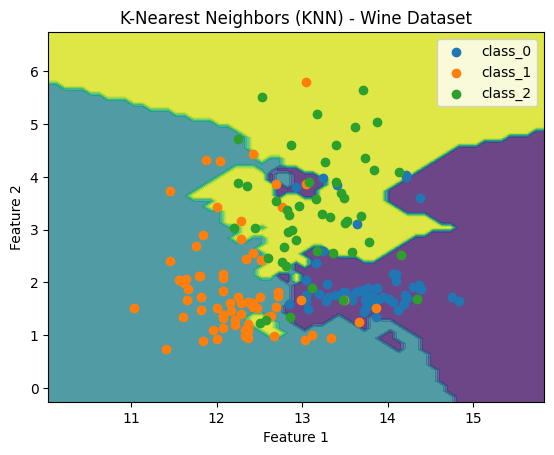

In [9]:
# Plot the decision boundary
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

# Plot the training data points
for i, class_label in enumerate(wine.target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=class_label)

plt.title('K-Nearest Neighbors (KNN) - Wine Dataset')
plt.xlabel('Flavanoids')
plt.ylabel('Proline')
plt.legend()
plt.show()